### Аналитика данных компании Gectaro

**Цель:** Проанализировать имеющиеся данные, составить портреты наиболее типичных клиентов, разобраться в причинах оттока клиентов, предложить решения по их минимизации.

**Задачи:** Провести исследовательский анализ данных; проверить гипотезы о связи целевой переменной с различными признаками пользоателей; сформулировать выводы.

### Материалы проекта

Ссылка на презентацию:https://docs.google.com/presentation/d/1IYBjfMBjotnVQ4YVdYLRnLFW5ijiiSg_XcT1Xhulrek/edit?usp=sharing

### Импорт библиотек, первичный обзор данных, предобработка

In [381]:
#импорт библиотек
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import phik
from phik.report import plot_correlation_matrix
from phik import report

In [382]:
#установка phik
! pip install phik

Defaulting to user installation because normal site-packages is not writeable

In [383]:
#загрузка данных
activities = pd.read_csv('C:\\Users\\Дарья\\Desktop\\masterskaya_STD1_Gectaro\\activities.csv')
billing = pd.read_csv('C:\\Users\\Дарья\\Desktop\\masterskaya_STD1_Gectaro\\billing.csv', index_col=0)
companies = pd.read_csv('C:\\Users\\Дарья\\Desktop\\masterskaya_STD1_Gectaro\\companies.csv')
people = pd.read_csv('C:\\Users\\Дарья\\Desktop\\masterskaya_STD1_Gectaro\\people.csv')

### Активности

In [384]:
activities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6316 entries, 0 to 6315
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     6316 non-null   int64  
 1   company_id                     6316 non-null   int64  
 2   month                          6316 non-null   object 
 3   company-month-billing          6316 non-null   float64
 4   company-month-stocks           6316 non-null   float64
 5   company-month-backups          6316 non-null   float64
 6   company-month-projects         6316 non-null   float64
 7   company-month-contractors      6316 non-null   float64
 8   company-month-resource_orders  6316 non-null   float64
dtypes: float64(6), int64(2), object(1)
memory usage: 444.2+ KB


In [385]:
activities.head()

,Unnamed: 0,company_id,month,company-month-billing,company-month-stocks,company-month-backups,company-month-projects,company-month-contractors,company-month-resource_orders
0,0,1,2019-09-01 00:00:00+00:00,1.0,0.0,0.0,7.0,0.0,0.0
1,1,1,2019-12-01 00:00:00+00:00,1.0,0.0,0.0,2.0,1.0,0.0
2,2,1,2020-04-01 00:00:00+00:00,4.0,1.0,0.0,1.0,6.0,0.0
3,3,1,2020-07-01 00:00:00+00:00,1.0,7.0,3.0,5.0,0.0,0.0
4,4,21,2020-01-01 00:00:00+00:00,3.0,0.0,0.0,1.0,0.0,0.0


Приведем к единообразному виду наименование столбцов, удалим столбец инденксов 'Unnamed: 0'.

In [386]:
activities = activities.rename(columns={'company-month-billing': 'company_month_billing', 'company-month-stocks': 
                                        'company_month_stocks', 'company-month-backups': 'company_month_backups', 
                                        'company-month-projects': 'company_month_projects', 'company-month-contractors':
                                        'company_month_contractors', 'company-month-resource_orders': 'company_month_resource_orders'})
activities.columns

Index(['Unnamed: 0', 'company_id', 'month', 'company_month_billing',
       'company_month_stocks', 'company_month_backups',
       'company_month_projects', 'company_month_contractors',
       'company_month_resource_orders'],
      dtype='object')

In [387]:
#удаляем 
activities = activities.drop('Unnamed: 0', axis=1)
#проверяем
activities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6316 entries, 0 to 6315
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   company_id                     6316 non-null   int64  
 1   month                          6316 non-null   object 
 2   company_month_billing          6316 non-null   float64
 3   company_month_stocks           6316 non-null   float64
 4   company_month_backups          6316 non-null   float64
 5   company_month_projects         6316 non-null   float64
 6   company_month_contractors      6316 non-null   float64
 7   company_month_resource_orders  6316 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 394.9+ KB


In [388]:
print('Количество уникальных клиентов-компаний в таблице activities:', activities['company_id'].nunique())

Количество уникальных клиентов-компаний в таблице activities: 716


#### Дубликаты

In [389]:
# полные дубликаты
activities.duplicated().sum()

0

Полных дубликатов в таблице activities нет. Столбцов, которые можно было бы проверить на уникальность значений, тоже нет.

#### Пропуски

In [390]:
pd.DataFrame(round((activities.isna().mean()*100),1)).style.background_gradient()

,0
company_id,0.000000
month,0.000000
company_month_billing,0.000000
company_month_stocks,0.000000
company_month_backups,0.000000
company_month_projects,0.000000
company_month_contractors,0.000000
company_month_resource_orders,0.000000


Пропусков нет.

#### Типы данных

In [391]:
#посмотрим на типы данных
activities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6316 entries, 0 to 6315
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   company_id                     6316 non-null   int64  
 1   month                          6316 non-null   object 
 2   company_month_billing          6316 non-null   float64
 3   company_month_stocks           6316 non-null   float64
 4   company_month_backups          6316 non-null   float64
 5   company_month_projects         6316 non-null   float64
 6   company_month_contractors      6316 non-null   float64
 7   company_month_resource_orders  6316 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 394.9+ KB


Тип данных столбца month не соответствует данным, преобразуем.

In [392]:
activities['month'] = pd.to_datetime(activities['month'])
activities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6316 entries, 0 to 6315
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   company_id                     6316 non-null   int64              
 1   month                          6316 non-null   datetime64[ns, UTC]
 2   company_month_billing          6316 non-null   float64            
 3   company_month_stocks           6316 non-null   float64            
 4   company_month_backups          6316 non-null   float64            
 5   company_month_projects         6316 non-null   float64            
 6   company_month_contractors      6316 non-null   float64            
 7   company_month_resource_orders  6316 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(6), int64(1)
memory usage: 394.9 KB


#### Анализ признаков

In [393]:
activities.describe().T

,count,mean,std,min,25%,50%,75%,max
company_id,6316.0,4280.338505,2413.005439,1.0,2459.0,4112.0,6080.0,9931.0
company_month_billing,6316.0,0.375079,0.800281,0.0,0.0,0.0,1.0,16.0
company_month_stocks,6316.0,7.408486,13.107824,0.0,1.0,3.0,8.0,166.0
company_month_backups,6316.0,1.178277,3.135253,0.0,0.0,0.0,0.0,22.0
company_month_projects,6316.0,7.262666,13.899203,0.0,1.0,2.0,7.0,221.0
company_month_contractors,6316.0,7.906428,27.966199,0.0,0.0,2.0,7.0,1014.0
company_month_resource_orders,6316.0,10.346105,40.569956,0.0,0.0,0.0,4.0,1182.0


In [394]:
#посмторим медианы
warnings.filterwarnings('ignore') # отключаем предупреждения
activities.median()

company_id                       4112.0
company_month_billing               0.0
company_month_stocks                3.0
company_month_backups               0.0
company_month_projects              2.0
company_month_contractors           2.0
company_month_resource_orders       0.0
dtype: float64

In [395]:
#функция для отрисовки распределения числовых признаков
warnings.filterwarnings('ignore') # отключаем предупреждения
def func_hist(data, column):
    fig, ax = plt.subplots(figsize = (15, 5))
    sns.distplot(data[column], color="#72AEEB", ax = plt.subplot(1, 2, 1))
    plt.xlabel('Распределение признака {}'.format(column))
    plt.ylabel('Частота')
    df_boxpl = data.groupby(col).agg(count=('company_id', 'count')).reset_index()
    sns.boxplot(y = column, data = df_boxpl, ax = plt.subplot(1, 2, 2), color="#72AEEB") 
    plt.xlabel('')
    plt.ylabel(column)
    plt.suptitle('Признак {}'.format(column))
    plt.show()

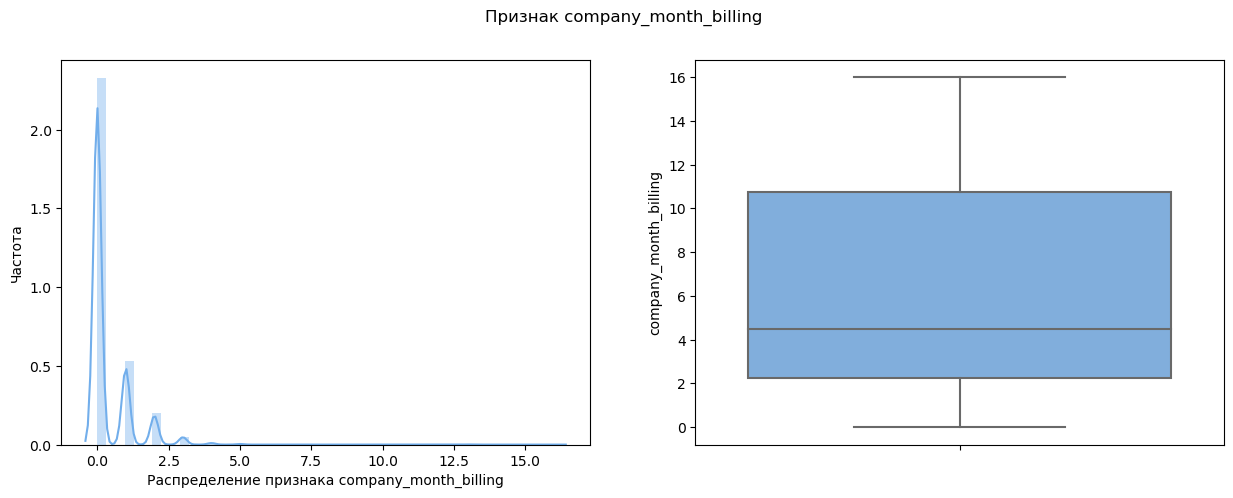

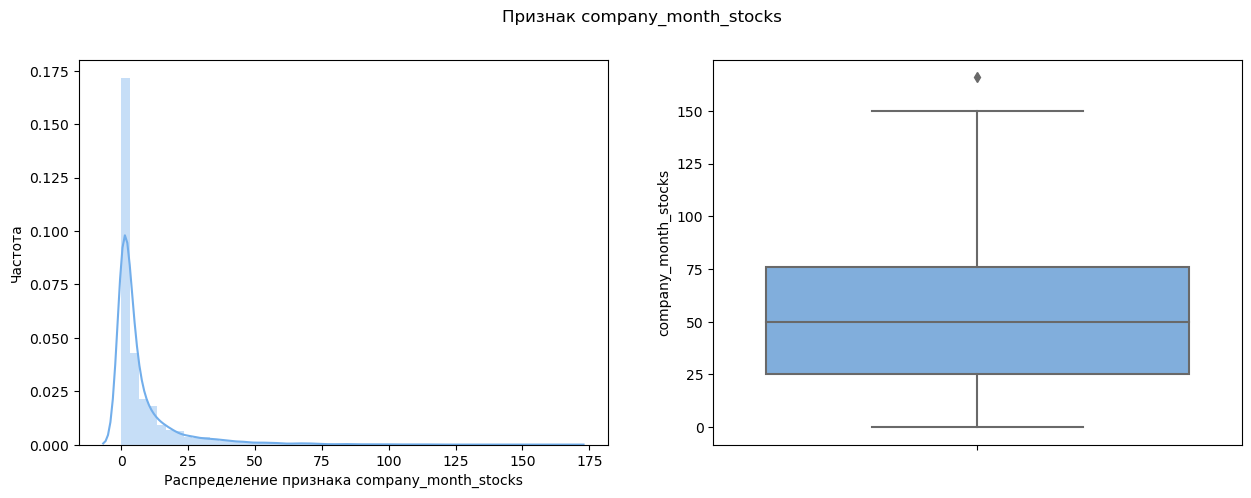

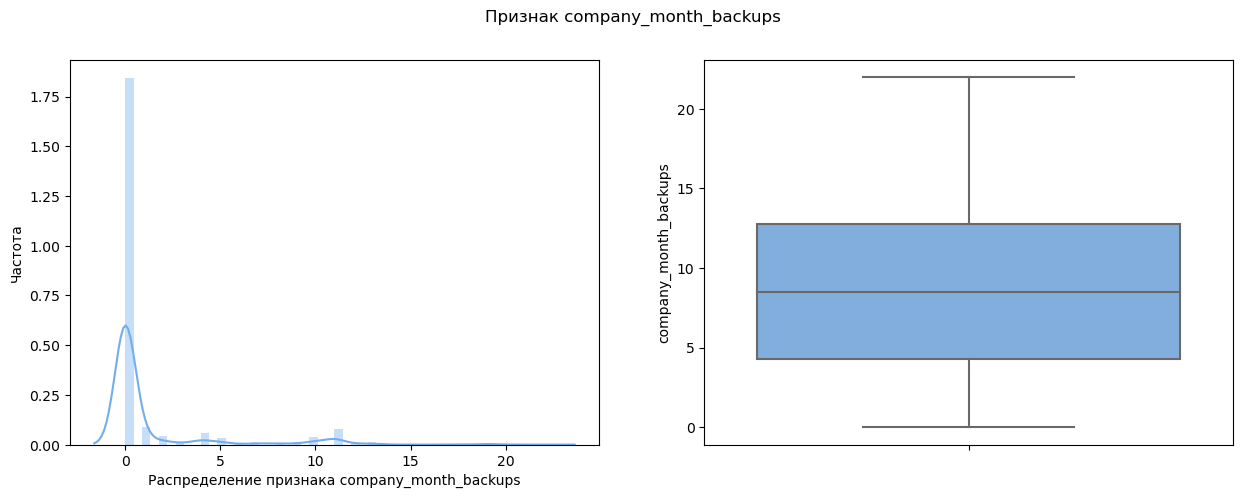

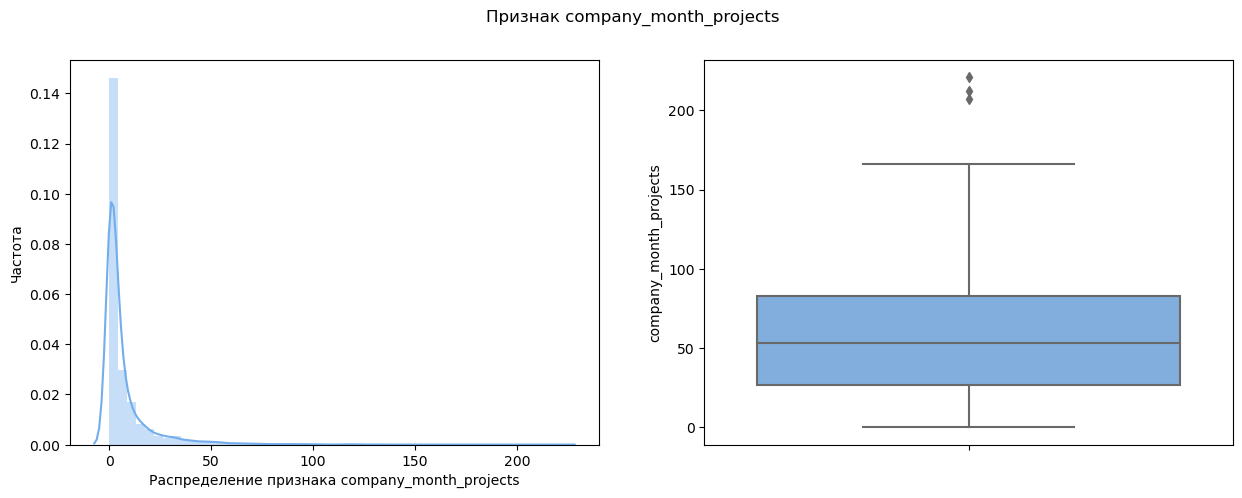

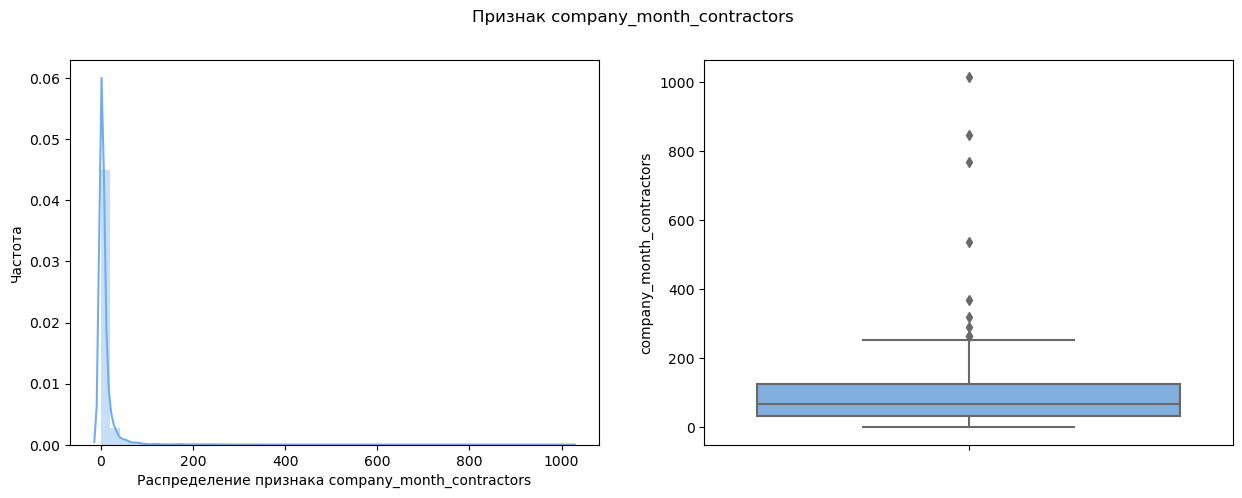

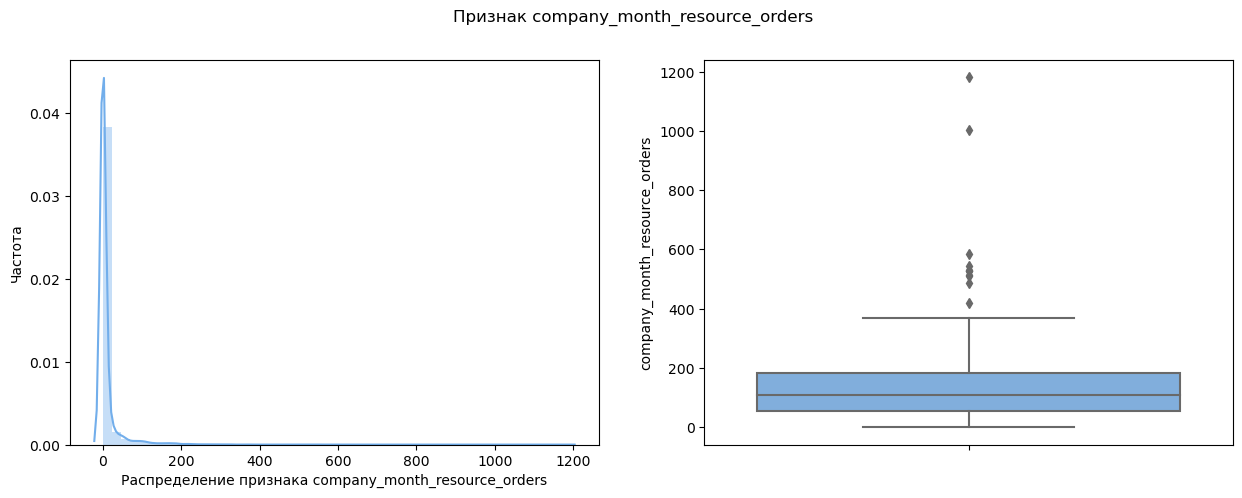

In [396]:
for col in ['company_month_billing', 'company_month_stocks', 'company_month_backups', 'company_month_projects',\
            'company_month_contractors', 'company_month_resource_orders']:
    func_hist(activities, col)

Все распределения скошены вправо, средние значения больше медианных из-за влияния аномальных (выбивающихся) значений. Удалим данные с аномальными значениями.

In [397]:
#company_month_stocks
activities = activities[activities['company_month_stocks'] < 150]
activities[activities['company_month_stocks'] > 150]

,company_id,month,company_month_billing,company_month_stocks,company_month_backups,company_month_projects,company_month_contractors,company_month_resource_orders


In [398]:
#company_month_projects
activities = activities[activities['company_month_projects'] < 140]
activities[activities['company_month_projects'] > 140]

,company_id,month,company_month_billing,company_month_stocks,company_month_backups,company_month_projects,company_month_contractors,company_month_resource_orders


In [399]:
#company_month_contractors
activities = activities[activities['company_month_contractors'] < 180]
activities[activities['company_month_contractors'] > 180]

,company_id,month,company_month_billing,company_month_stocks,company_month_backups,company_month_projects,company_month_contractors,company_month_resource_orders


In [400]:
#company_month_resource_orders
activities = activities[activities['company_month_resource_orders'] < 320]
activities[activities['company_month_resource_orders'] > 320]

,company_id,month,company_month_billing,company_month_stocks,company_month_backups,company_month_projects,company_month_contractors,company_month_resource_orders


Отрисуем заново.

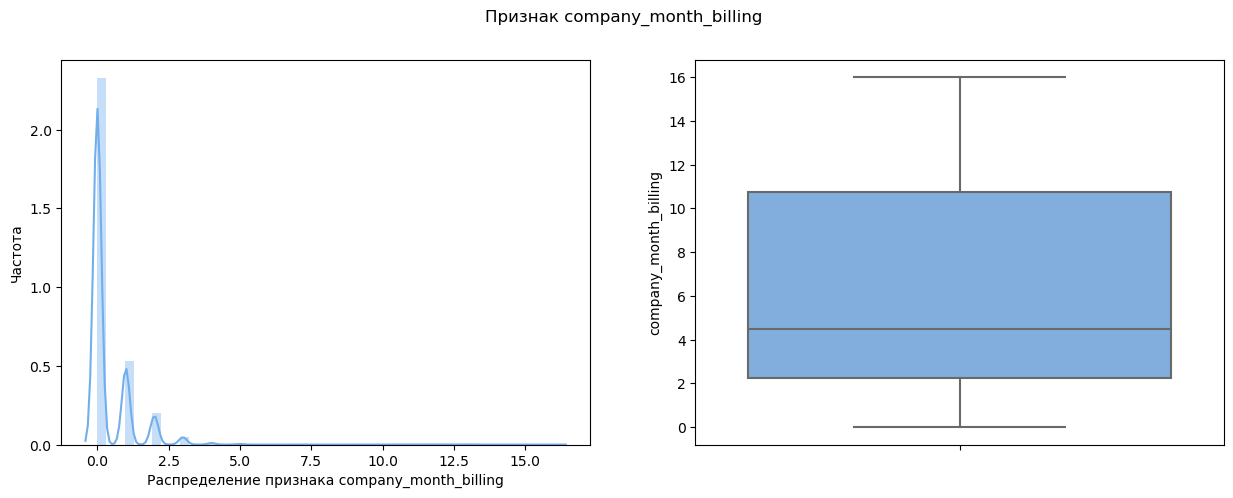

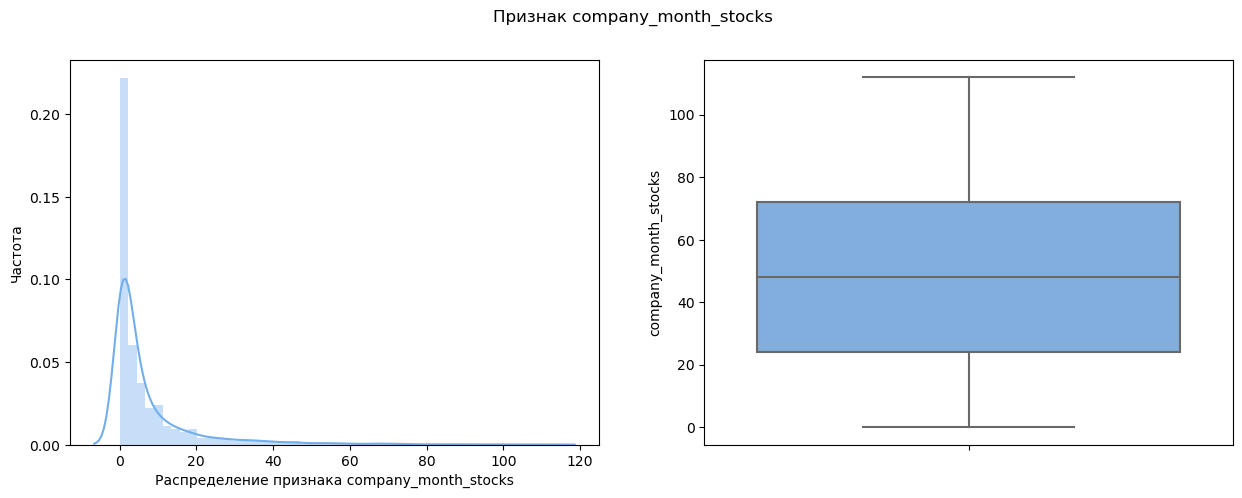

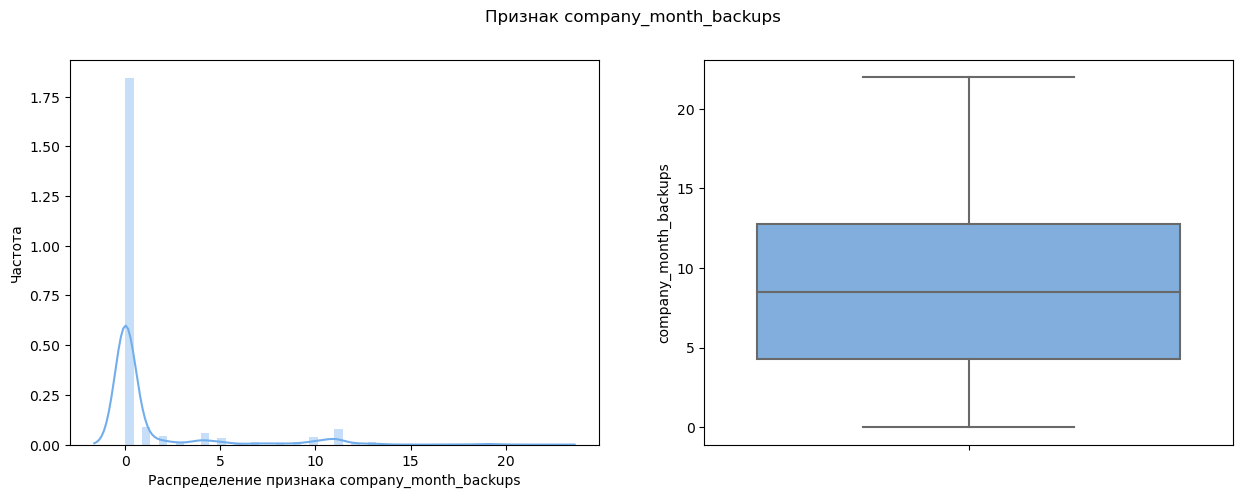

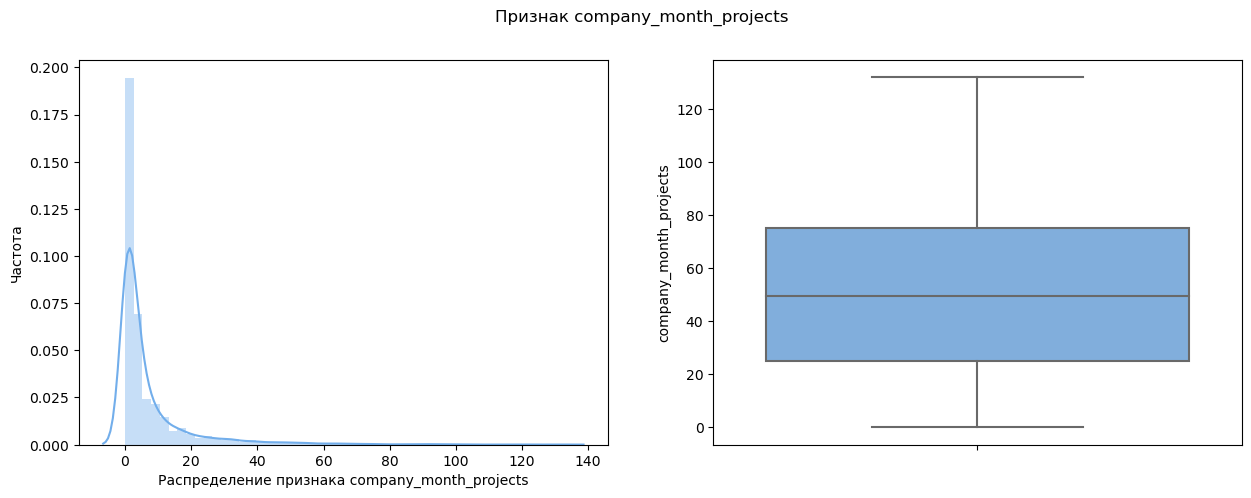

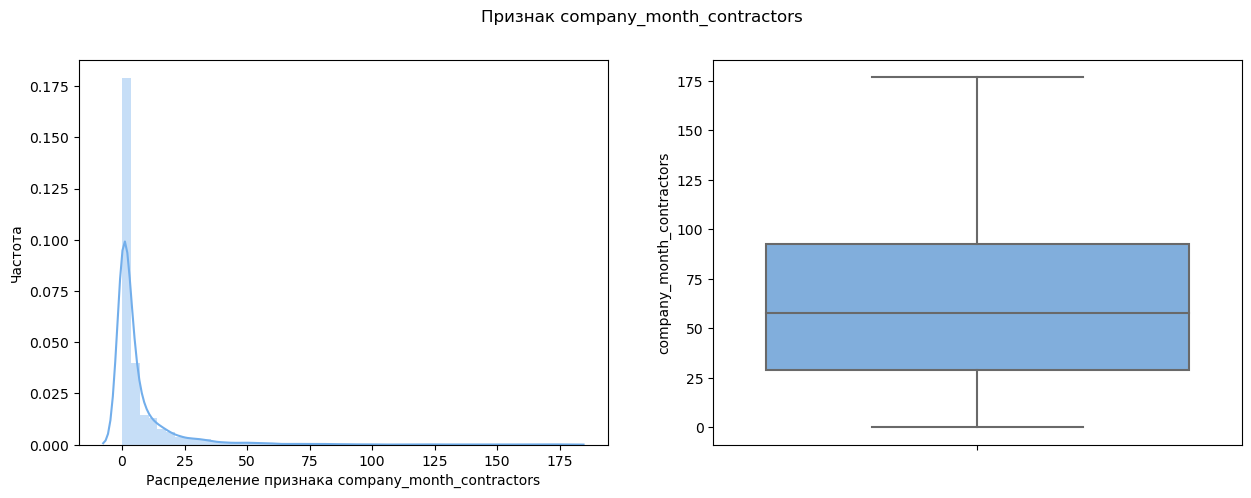

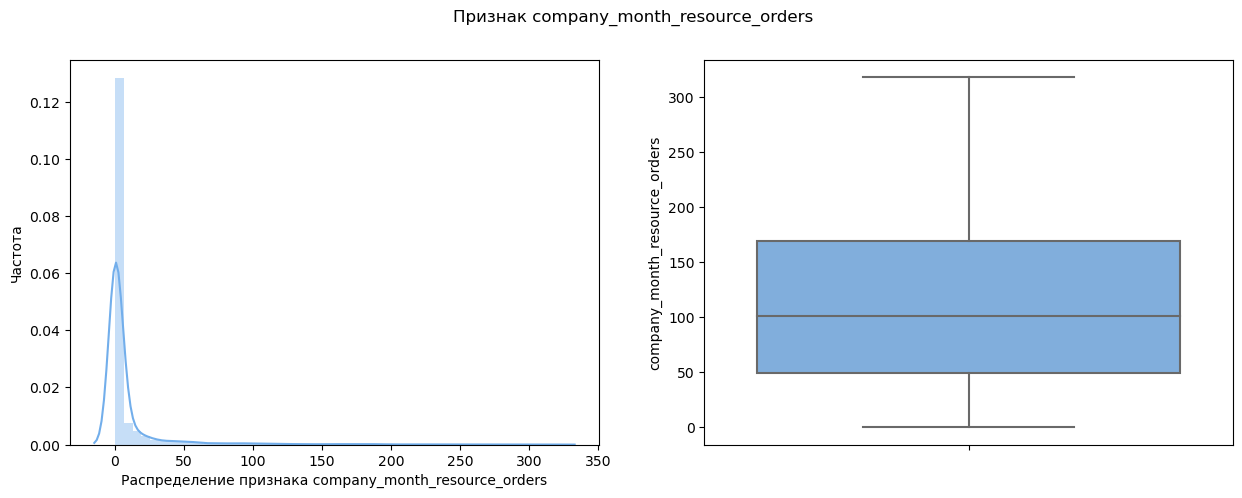

In [401]:
for col in ['company_month_billing', 'company_month_stocks', 'company_month_backups', 'company_month_projects',\
            'company_month_contractors', 'company_month_resource_orders']:
    func_hist(activities, col)

In [402]:
activities.describe().T

,count,mean,std,min,25%,50%,75%,max
company_id,6274.0,4276.470673,2412.173042,1.0,2459.0,4124.0,6071.0,9931.0
company_month_billing,6274.0,0.375518,0.800852,0.0,0.0,0.0,1.0,16.0
company_month_stocks,6274.0,7.263628,12.611410,0.0,1.0,3.0,8.0,112.0
company_month_backups,6274.0,1.177080,3.136063,0.0,0.0,0.0,0.0,22.0
company_month_projects,6274.0,7.001116,12.617293,0.0,1.0,2.0,7.0,132.0
company_month_contractors,6274.0,6.682021,14.421402,0.0,0.0,2.0,7.0,177.0
company_month_resource_orders,6274.0,8.945649,28.654064,0.0,0.0,0.0,4.0,318.0


In [403]:
#посмторим медианы
warnings.filterwarnings('ignore') # отключаем предупреждения
activities.median()

company_id                       4124.0
company_month_billing               0.0
company_month_stocks                3.0
company_month_backups               0.0
company_month_projects              2.0
company_month_contractors           2.0
company_month_resource_orders       0.0
dtype: float64

У всех распределений пики на 0 - min значении. Самый большой разброс данных у признака "месячное количество заказов материалов компании".

### Платежи

Посмотрим на данные и информацию о них.

In [404]:
billing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3480 entries, 4 to 18953
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               3480 non-null   int64  
 1   id                       3480 non-null   int64  
 2   user_id                  3480 non-null   int64  
 3   company_id               3480 non-null   int64  
 4   billing_tariff_id        3480 non-null   int64  
 5   payed_until              3480 non-null   int64  
 6   is_payed                 3480 non-null   bool   
 7   created_at               3480 non-null   int64  
 8   updated_at               3480 non-null   int64  
 9   billing_tariff_price_id  3480 non-null   float64
 10  comment                  745 non-null    object 
 11  pay_date                 1108 non-null   float64
dtypes: bool(1), float64(2), int64(8), object(1)
memory usage: 329.6+ KB


In [405]:
billing.head()

,Unnamed: 0,id,user_id,company_id,billing_tariff_id,payed_until,is_payed,created_at,updated_at,billing_tariff_price_id,comment,pay_date
4,4,3050,567,512,3,1640153302,False,1608617302,1608617302,12.0,NaN,NaN
6,6,3051,2861,2474,7,1640131200,True,1608626162,1608626181,23.0,NaN,1.608626e+09
16,16,3059,1902,1645,2,1616577484,False,1608801484,1608801484,6.0,NaN,NaN
18,18,3065,2352,2035,7,1643500799,False,1608883175,1608883175,23.0,NaN,NaN
24,24,3062,1074,926,3,1611964800,True,1608814072,1608899674,9.0,NaN,1.609200e+09


Оставим один столбец индексов с шагом 1. 

In [406]:
billing.index = range(len(billing['Unnamed: 0']))
billing.index

RangeIndex(start=0, stop=3480, step=1)

In [407]:
#удаляем 
billing = billing.drop('Unnamed: 0', axis=1)
#проверяем
billing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3480 entries, 0 to 3479
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       3480 non-null   int64  
 1   user_id                  3480 non-null   int64  
 2   company_id               3480 non-null   int64  
 3   billing_tariff_id        3480 non-null   int64  
 4   payed_until              3480 non-null   int64  
 5   is_payed                 3480 non-null   bool   
 6   created_at               3480 non-null   int64  
 7   updated_at               3480 non-null   int64  
 8   billing_tariff_price_id  3480 non-null   float64
 9   comment                  745 non-null    object 
 10  pay_date                 1108 non-null   float64
dtypes: bool(1), float64(2), int64(7), object(1)
memory usage: 275.4+ KB


Проверим отсутствие компаний, пользующихся пробными, промо и бесплатными тарифами (1,18,22)

In [408]:
billing.query('billing_tariff_id==1 or billing_tariff_id==18 or billing_tariff_id==22')

,id,user_id,company_id,billing_tariff_id,payed_until,is_payed,created_at,updated_at,billing_tariff_price_id,comment,pay_date


Отсутствуют.

Проверим соответствие уникальных id платежей количеству строк и посчитаем уникальных клиентов.

In [409]:
print('Уникальные проводки платежей:', billing['id'].nunique(), 'Уникальные company_id:', billing['company_id'].nunique(), 'Уникальные user_id:', billing['user_id'].nunique())      

Уникальные проводки платежей: 3480 Уникальные company_id: 1841 Уникальные user_id: 1841


Уникальные id платежей соответствуют количеству строк. Количество уникальных id компаний и пользователей равны.

#### Дубликаты

In [410]:
# полные дубликаты
billing.duplicated().sum()

0

Полных дубликатов нет. Поищем дубликаты по сочетанию нескольких признаков.

In [411]:
billing[billing.duplicated(['user_id', 'company_id', 'billing_tariff_id', 'payed_until', 'is_payed', 'created_at',\
                            'updated_at', 'billing_tariff_price_id', 'pay_date'])]

,id,user_id,company_id,billing_tariff_id,payed_until,is_payed,created_at,updated_at,billing_tariff_price_id,comment,pay_date
2144,7856,5832,4603,7,1680176809,False,1648640809,1648640809,23.0,NaN,NaN


In [412]:
billing.query('user_id==5832 and billing_tariff_price_id==23.0 and created_at==1648640809')

,id,user_id,company_id,billing_tariff_id,payed_until,is_payed,created_at,updated_at,billing_tariff_price_id,comment,pay_date
2143,7855,5832,4603,7,1680176809,False,1648640809,1648640809,23.0,NaN,NaN
2144,7856,5832,4603,7,1680176809,False,1648640809,1648640809,23.0,NaN,NaN


Как будто бы похоже на дубликаты. Удалим.

In [413]:
#удаляем
billing = billing.drop_duplicates(subset=['user_id', 'company_id', 'billing_tariff_id', 'payed_until', 'is_payed', 'created_at',\
                            'updated_at', 'billing_tariff_price_id', 'pay_date'], keep="last")
#проверяем
billing[billing.duplicated(['user_id', 'company_id', 'billing_tariff_id', 'payed_until', 'is_payed', 'created_at',\
                            'updated_at', 'billing_tariff_price_id', 'pay_date'])]

,id,user_id,company_id,billing_tariff_id,payed_until,is_payed,created_at,updated_at,billing_tariff_price_id,comment,pay_date


#### Пропуски

In [414]:
pd.DataFrame(round((billing.isna().mean()*100),1)).style.background_gradient()

,0
id,0.000000
user_id,0.000000
company_id,0.000000
billing_tariff_id,0.000000
payed_until,0.000000
is_payed,0.000000
created_at,0.000000
updated_at,0.000000
billing_tariff_price_id,0.000000
comment,78.600000


Имеем пропуски в двух столбцах: комментарий и дата платежа. Думаю, что пропуски в признаке "комментарий" отсутствуют совершенно случайно (MCAR), т.е. не имеют зависимости от наблюдаемых и ненаблюдаемых переменных. Пропуски в pay_date - псмотрим сколько их.

In [415]:
print('Количество пропусков в pay_date:', len(billing[billing['pay_date'].isna()]))

Количество пропусков в pay_date: 2371


Посмотрим на распределение значений в is_payed в разрезе пропусков в pay_date

In [416]:
billing[billing['pay_date'].isna()]['is_payed'].value_counts()

False    2126
True      245
Name: is_payed, dtype: int64

Из 2372 пропусков в pay_date имеют 245 значений True в is_payed, что как будто бы нелогично. Попробуем рассмотреть что-нибудь интересное в таких данных. 

In [417]:
billing[(billing['is_payed']==True) & (billing['pay_date'].isna())].head()

,id,user_id,company_id,billing_tariff_id,payed_until,is_payed,created_at,updated_at,billing_tariff_price_id,comment,pay_date
102,2487,2290,1975,7,1612051200,True,1602835768,1610974979,21.0,"Стартовый с 24,10-24,01, деактивирую 12,01 для...",NaN
308,2963,2748,2391,3,1641168000,True,1606977764,1616655484,12.0,"25,03,21 продлили на 1 мес, т.к. очень сильно ...",NaN
408,1868,1093,943,7,1612396800,True,1596530576,1596530592,22.0,NaN,NaN
440,1966,711,628,2,1600819200,True,1597664983,1600688383,1.0,"оплатил стартовый, но хотел с бэкапом, поэтому...",NaN
494,1834,1769,1528,7,1604188800,True,1596014110,1601549394,21.0,"09,09 - остановили тариф, который был до 12,11...",NaN


In [418]:
billing[(billing['is_payed']==False) & (billing['pay_date'].notna())].head(10)

,id,user_id,company_id,billing_tariff_id,payed_until,is_payed,created_at,updated_at,billing_tariff_price_id,comment,pay_date
15,3057,2920,2507,4,1624406400,False,1608717664,1608725138,15.0,"23,12 - оплатили, ожидаем в январе сообщение о...",1.608854e+09
20,4309,3903,3244,7,1657843200,False,1622474022,1622474046,23.0,NaN,1.622419e+09
35,4176,4007,3323,7,1640649600,False,1621426405,1623413853,22.0,6+1 мес,1.621382e+09
53,4505,3903,3244,2,1656460800,False,1624023658,1624023683,8.0,NaN,1.624579e+09
61,4473,4363,3579,2,1672531200,False,1623829630,1624459932,24.0,NaN,1.623802e+09
63,5094,3924,3260,7,1703548800,False,1628760471,1628760516,34.0,NaN,1.629936e+09
66,5098,689,615,2,1644624000,False,1628762664,1628769576,7.0,NaN,1.628726e+09
71,5105,4925,3963,7,1664236800,False,1628845658,1628845703,23.0,NaN,1.630022e+09
88,3160,2572,2233,2,1642032000,False,1610555213,1610555246,8.0,NaN,1.610582e+09
90,3244,3131,2685,7,1626739200,False,1611150951,1611150969,22.0,NaN,1.611878e+09


In [419]:
billing.groupby(['is_payed']).agg({'pay_date': 'count'}).reset_index()

,is_payed,pay_date
0,False,237
1,True,871


Явно не прослеживается никаких зависимостей между отсутствующими значениями в pay_date и другими признаками. Оставляем пропуски.

#### Типы даных

Типы не соответствуют данным в столбцах pay_date, created_at, updated_at, payed_until, billing_tariff_price_id. Заменим.

In [420]:
billing['pay_date'] = pd.to_datetime(billing['pay_date'], unit='s')
billing['created_at'] = pd.to_datetime(billing['created_at'], unit='s')
billing['updated_at'] = pd.to_datetime(billing['updated_at'], unit='s')
billing['payed_until'] = pd.to_datetime(billing['payed_until'], unit='s')
billing['billing_tariff_price_id'] = billing['billing_tariff_price_id'].astype('int')
billing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3479 entries, 0 to 3479
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       3479 non-null   int64         
 1   user_id                  3479 non-null   int64         
 2   company_id               3479 non-null   int64         
 3   billing_tariff_id        3479 non-null   int64         
 4   payed_until              3479 non-null   datetime64[ns]
 5   is_payed                 3479 non-null   bool          
 6   created_at               3479 non-null   datetime64[ns]
 7   updated_at               3479 non-null   datetime64[ns]
 8   billing_tariff_price_id  3479 non-null   int32         
 9   comment                  745 non-null    object        
 10  pay_date                 1108 non-null   datetime64[ns]
dtypes: bool(1), datetime64[ns](4), int32(1), int64(4), object(1)
memory usage: 288.8+ KB


#### Анализ признаков

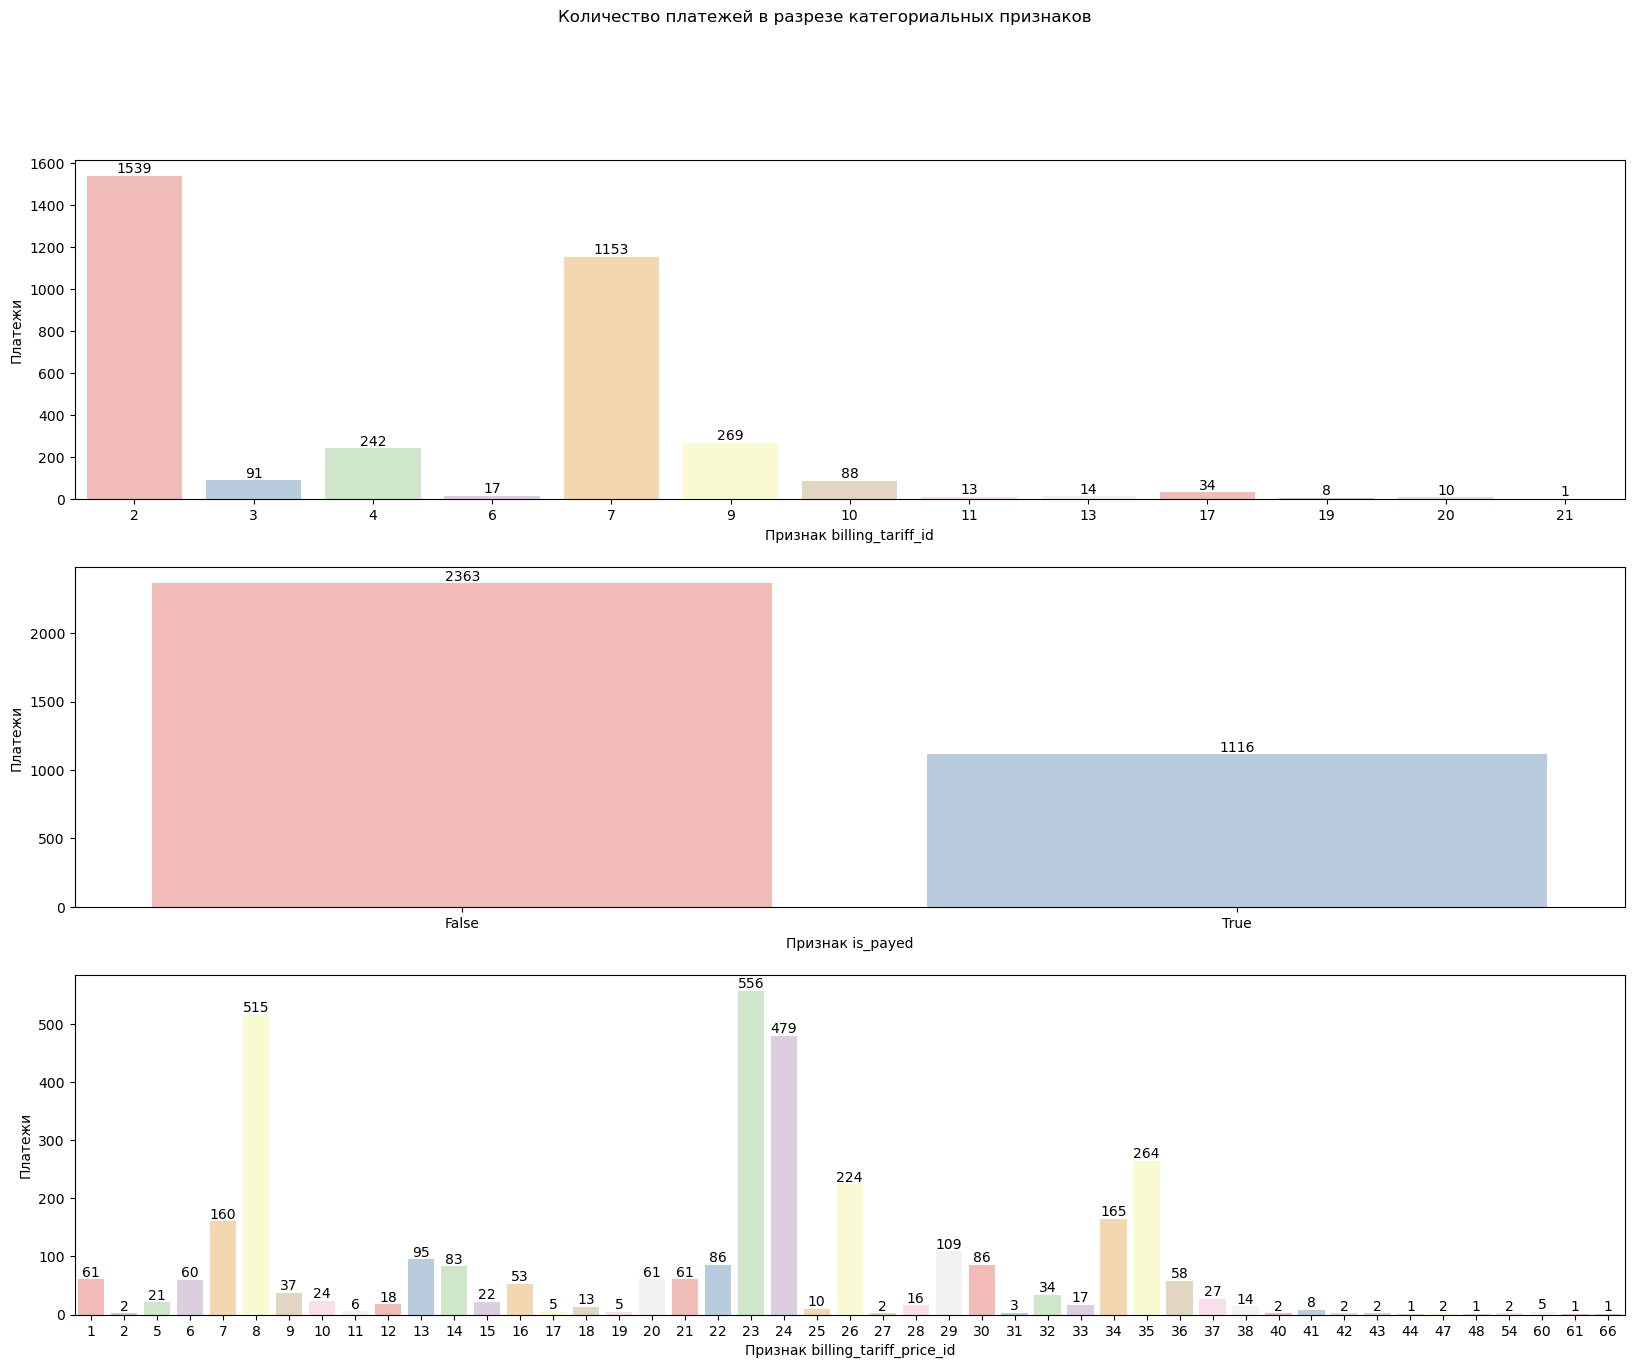

In [421]:
#рисуем распределение категориальных признаков
list_1 = ['billing_tariff_id', 'is_payed', 'billing_tariff_price_id']
fig, ax = plt.subplots(3, 1, figsize = (20, 15))
for col, i in zip(list_1, ax.flatten()):
    sns.countplot(x = col, data = billing, ax=i, palette='Pastel1')
    i.bar_label(i.containers[0])
    i.set_ylabel('Платежи')
    i.set_xlabel('Признак {}'.format(col))
    plt.show
fig.suptitle("Количество платежей в разрезе категориальных признаков");

Итак, больше всего оплат у тарифных планов 2 и 7, которые относятся к группам "Старт" и "Базовый". По признаку "is_payed" больше неоплат, чем оплат. Признак "billing_tariff_price_id"(ид стоимости тарифа) включает в себя по сути три признака: клиент, тариф, время, и, без привязки к компаниям, анализировать распределение данного признака кажется, что не имеет смысла. 

### Компании

Посмотрим на данные и их характеристики.

In [422]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 723 entries, 0 to 722
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               723 non-null    int64  
 1   id                       723 non-null    int64  
 2   working_direction        720 non-null    object 
 3   employer_count_interval  723 non-null    float64
 4   created_at               723 non-null    int64  
 5   updated_at               723 non-null    int64  
 6   billing_tariff_id        716 non-null    float64
 7   billing_is_over          723 non-null    bool   
dtypes: bool(1), float64(2), int64(4), object(1)
memory usage: 40.4+ KB


In [423]:
companies.head(10)

,Unnamed: 0,id,working_direction,employer_count_interval,created_at,updated_at,billing_tariff_id,billing_is_over
0,19,514,-,1.0,1571316635,1670298314,4.0,True
1,57,383,Строительство,2.0,1564142565,1676550050,7.0,False
2,69,495,-,1.0,1570535695,1598281714,2.0,False
3,75,724,-,1.0,1579514393,1670298294,4.0,True
4,99,471,-,1.0,1569328017,1670298360,7.0,True
5,124,8236,Строительство,2.0,1688014977,1690893826,2.0,False
6,156,726,-,1.0,1579548836,1670298343,4.0,True
7,157,650,Генеральный подрядчик,4.0,1575784898,1670298346,2.0,True
8,189,8900,Строительная компания,7.0,1695382331,1695471247,2.0,False
9,200,496,Строительство,1.0,1570749473,1670298304,4.0,True


Удалим столбец 'Unnamed: 0'

In [424]:
#удаляем 
companies = companies.drop('Unnamed: 0', axis=1)
#проверяем
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 723 entries, 0 to 722
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       723 non-null    int64  
 1   working_direction        720 non-null    object 
 2   employer_count_interval  723 non-null    float64
 3   created_at               723 non-null    int64  
 4   updated_at               723 non-null    int64  
 5   billing_tariff_id        716 non-null    float64
 6   billing_is_over          723 non-null    bool   
dtypes: bool(1), float64(2), int64(3), object(1)
memory usage: 34.7+ KB


**Первичный обзор данных:** пропуски в working_direction и billing_tariff_id, данные не соответствуют данным в created_at, updated_at, billing_tariff_id

Посчитаем количество уникальных id в таблице.

In [425]:
print('Количество уникальных id в таблице:', companies['id'].nunique())

Количество уникальных id в таблице: 723


Соответствует количеству строк.

#### Дубликаты

In [426]:
#явные дубликаты
companies.duplicated().sum()

0

#### Пропуски

In [427]:
pd.DataFrame(round((companies.isna().mean()*100),1)).style.background_gradient()

,0
id,0.000000
working_direction,0.400000
employer_count_interval,0.000000
created_at,0.000000
updated_at,0.000000
billing_tariff_id,1.000000
billing_is_over,0.000000


Пропусков очень мало, можно удалить.

In [428]:
companies = companies.dropna(subset=['billing_tariff_id', 'working_direction'])
companies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 713 entries, 0 to 722
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       713 non-null    int64  
 1   working_direction        713 non-null    object 
 2   employer_count_interval  713 non-null    float64
 3   created_at               713 non-null    int64  
 4   updated_at               713 non-null    int64  
 5   billing_tariff_id        713 non-null    float64
 6   billing_is_over          713 non-null    bool   
dtypes: bool(1), float64(2), int64(3), object(1)
memory usage: 39.7+ KB


#### Типы даных

Меняем типы данных в столбцах created_at, updated_at, billing_tariff_id

In [429]:
companies['created_at'] = pd.to_datetime(companies['created_at'], unit='s')
companies['updated_at'] = pd.to_datetime(companies['updated_at'], unit='s')
companies['billing_tariff_id'] = companies['billing_tariff_id'].astype('int')
companies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 713 entries, 0 to 722
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       713 non-null    int64         
 1   working_direction        713 non-null    object        
 2   employer_count_interval  713 non-null    float64       
 3   created_at               713 non-null    datetime64[ns]
 4   updated_at               713 non-null    datetime64[ns]
 5   billing_tariff_id        713 non-null    int32         
 6   billing_is_over          713 non-null    bool          
dtypes: bool(1), datetime64[ns](2), float64(1), int32(1), int64(1), object(1)
memory usage: 36.9+ KB


#### Анализ признаков

На распределение признака 'working_direction' посмотрим с помощью метода value_counts(), без отрисовки.

In [430]:
companies['working_direction'].value_counts()

-                                                              452
Строительство                                                   55
строительство                                                   10
Малоэтажное строительство                                        5
-строительство                                                   4
                                                              ... 
Водоподготовка                                                   1
Ремонт квартир                                                   1
Строительство деревянных домов.                                  1
Строительство и проектирование зданий и сооружений               1
Строительство частной и коммерческой недвижимости с 2008 г.      1
Name: working_direction, Length: 169, dtype: int64

Немножечко "причешем" номенклатуру, хотяб в части "строительства".

In [431]:
companies['working_direction'] = companies['working_direction'].replace({'строительство ': 'Строительство', \
                                'СТРОИТЕЛЬСТВО': 'Строительство', 'строительство': 'Строительство', \
                                '-строительство': 'Строительство', 'Строительство ': 'Строительство',\
                                                                         'Отделка ': 'Отделка'})
companies['working_direction'].value_counts()

-                                                              452
Строительство                                                   76
Малоэтажное строительство                                        5
Строительство и ремонт                                           4
Строительная компания                                            3
                                                              ... 
Ремонт квартир                                                   1
Строительство деревянных домов.                                  1
Строительство и проектирование зданий и сооружений               1
Премиальная покраска и утепление деревянных домов                1
Строительство частной и коммерческой недвижимости с 2008 г.      1
Name: working_direction, Length: 163, dtype: int64

60% данных имеют '-' в признаке working_direction, чуть больше 10% - "строительство", остальные 30% - другие наименования (в том числе, связанные со строительством так или иначе), неисключающие дубли. Оставшиеся категориальные признаки нарисуем.

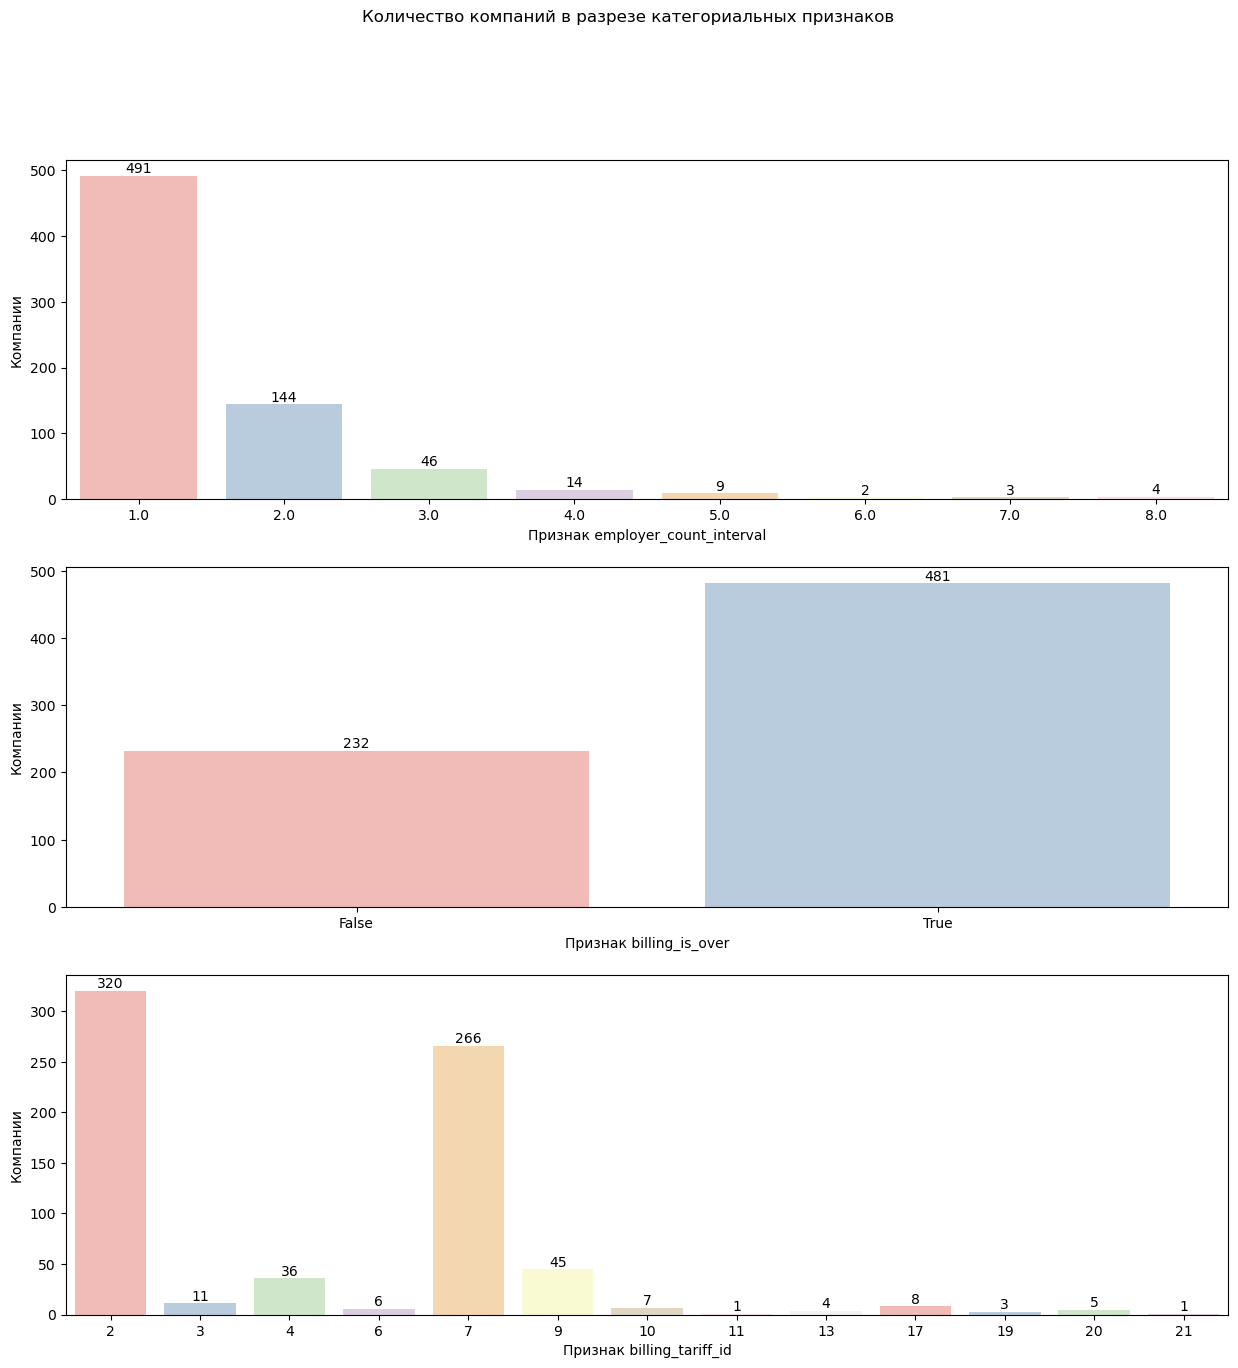

In [432]:
#рисуем распределение категориальных признаков
list_1 = ['employer_count_interval', 'billing_is_over', 'billing_tariff_id']
fig, ax = plt.subplots(3, 1, figsize = (15, 15))
for col, i in zip(list_1, ax.flatten()):
    sns.countplot(x = col, data = companies, ax=i, palette='Pastel1')
    i.bar_label(i.containers[0])
    i.set_ylabel('Компании')
    i.set_xlabel('Признак {}'.format(col))
    plt.show
fig.suptitle("Количество компаний в разрезе категориальных признаков");

Подавляющее большинство компаний с минимальным количеством сотрудников - от 1 до 4, и у большинства - истекла оплата. Распределение компаний по id тарифа выглядит логичным, исходя из распределения этого признака по платежам. 

### Сотрудники

In [433]:
people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5095 entries, 0 to 5094
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5095 non-null   int64  
 1   id          5095 non-null   int64  
 2   company_id  5095 non-null   int64  
 3   user_id     3813 non-null   float64
 4   role_id     5095 non-null   int64  
 5   created_at  5095 non-null   int64  
 6   updated_at  5095 non-null   int64  
 7   is_deleted  5095 non-null   bool   
 8   deleted_at  2180 non-null   float64
dtypes: bool(1), float64(2), int64(6)
memory usage: 323.5 KB


In [434]:
people.head(10)

,Unnamed: 0,id,company_id,user_id,role_id,created_at,updated_at,is_deleted,deleted_at
0,2,6601,495,NaN,7133,1570535962,1570535962,True,1.594067e+09
1,6,7025,1,NaN,1,1594120484,1594120484,True,1.594120e+09
2,7,7165,1255,1734.0,18085,1595438102,1595439391,True,1.633960e+09
3,10,7130,1470,1703.0,1,1595234824,1595234824,False,NaN
4,17,7163,1492,1731.0,1,1595429211,1598540644,True,1.620195e+09
5,20,7034,1317,1626.0,18955,1594222241,1594273668,False,NaN
6,21,6749,667,NaN,9614,1579877137,1579877137,True,NaN
7,22,6740,667,NaN,9614,1579179409,1579179409,True,NaN
8,34,7060,1330,1648.0,19134,1594627469,1594627856,True,1.594629e+09
9,40,7140,667,1712.0,9614,1595255488,1595255488,True,1.598614e+09


**Первичный обзор данных:** пропуски в user_id и deleted_at, тип данных не соответствуют данным в user_id, created_at, updated_at, deleted_at

Удалим столбец 'Unnamed: 0'

In [435]:
#удаляем 
people = people.drop('Unnamed: 0', axis=1)
#проверяем
people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5095 entries, 0 to 5094
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          5095 non-null   int64  
 1   company_id  5095 non-null   int64  
 2   user_id     3813 non-null   float64
 3   role_id     5095 non-null   int64  
 4   created_at  5095 non-null   int64  
 5   updated_at  5095 non-null   int64  
 6   is_deleted  5095 non-null   bool   
 7   deleted_at  2180 non-null   float64
dtypes: bool(1), float64(2), int64(5)
memory usage: 283.7 KB


Посмотрим количество уникальных значений в company_id и в user_id

In [436]:
people['company_id'].nunique()

712

In [437]:
people['user_id'].nunique()

3528

Интересно, что в companies уникальных компаний немного больше. Уникальных user_id меньше, чем ненулевых строк в данном признаке. 

#### Дубликаты

In [438]:
#полные дубликаты
people.duplicated().sum()

0

Поищем дубикаты по сочетанию нескольких признаков.

In [439]:
people[people.duplicated(['company_id', 'user_id', 'role_id', 'created_at', 'updated_at', 'is_deleted', 'deleted_at'])]

,id,company_id,user_id,role_id,created_at,updated_at,is_deleted,deleted_at
619,6401,218,NaN,3126,1552132278,1552132278,False,NaN
666,6993,589,NaN,8479,1592676879,1592676879,False,NaN
668,6995,589,NaN,8479,1592676880,1592676880,False,NaN
669,6996,589,NaN,8479,1592676880,1592676880,False,NaN
670,6997,589,NaN,8479,1592676880,1592676880,False,NaN
678,6682,639,NaN,9215,1575118562,1575118562,False,NaN
688,6738,667,NaN,9614,1579170868,1579170868,True,1.587028e+09


Посмотрим подробнее.

In [440]:
people[(people['company_id']==218) & (people['role_id']==3126)]

,id,company_id,user_id,role_id,created_at,updated_at,is_deleted,deleted_at
618,6400,218,NaN,3126,1552132278,1552132278,False,NaN
619,6401,218,NaN,3126,1552132278,1552132278,False,NaN


In [441]:
people[(people['company_id']==589) & (people['role_id']==8479) & (people['created_at']==1592676880)]

,id,company_id,user_id,role_id,created_at,updated_at,is_deleted,deleted_at
667,6994,589,NaN,8479,1592676880,1592676880,False,NaN
668,6995,589,NaN,8479,1592676880,1592676880,False,NaN
669,6996,589,NaN,8479,1592676880,1592676880,False,NaN
670,6997,589,NaN,8479,1592676880,1592676880,False,NaN


In [442]:
people[(people['company_id']==667) & (people['role_id']==9614) & (people['created_at']==1579170868)]

,id,company_id,user_id,role_id,created_at,updated_at,is_deleted,deleted_at
687,6737,667,NaN,9614,1579170868,1579170868,True,1.587028e+09
688,6738,667,NaN,9614,1579170868,1579170868,True,1.587028e+09


Видимо, какая-то ошибка записи данных присутствует. Удалим двойников.

In [443]:
#удаляем
people = people.drop_duplicates(subset=['company_id', 'user_id', 'role_id', 'created_at', 'updated_at',\
                                        'is_deleted', 'deleted_at'], keep="last")
#проверяем
people[people.duplicated(['company_id', 'user_id', 'role_id', 'created_at', 'updated_at', 'is_deleted', 'deleted_at'])]

,id,company_id,user_id,role_id,created_at,updated_at,is_deleted,deleted_at


#### Пропуски

In [444]:
pd.DataFrame(round((people.isna().mean()*100),1)).style.background_gradient()

,0
id,0.000000
company_id,0.000000
user_id,25.100000
role_id,0.000000
created_at,0.000000
updated_at,0.000000
is_deleted,0.000000
deleted_at,57.200000


Понятно, что удалять такое количество пропусков нельзя, заменить столь специфичные данные не получится.

#### Типы даных

In [445]:
people.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5088 entries, 0 to 5094
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          5088 non-null   int64  
 1   company_id  5088 non-null   int64  
 2   user_id     3813 non-null   float64
 3   role_id     5088 non-null   int64  
 4   created_at  5088 non-null   int64  
 5   updated_at  5088 non-null   int64  
 6   is_deleted  5088 non-null   bool   
 7   deleted_at  2179 non-null   float64
dtypes: bool(1), float64(2), int64(5)
memory usage: 323.0 KB


Преобразуем типы в столбцах user_id, created_at, updated_at, deleted_at.

In [446]:
people['created_at'] = pd.to_datetime(people['created_at'], unit='s')
people['updated_at'] = pd.to_datetime(people['updated_at'], unit='s')
people['deleted_at'] = pd.to_datetime(people['deleted_at'], unit='s')
people['user_id'] = people['user_id'].astype('Int64')
people.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5088 entries, 0 to 5094
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          5088 non-null   int64         
 1   company_id  5088 non-null   int64         
 2   user_id     3813 non-null   Int64         
 3   role_id     5088 non-null   int64         
 4   created_at  5088 non-null   datetime64[ns]
 5   updated_at  5088 non-null   datetime64[ns]
 6   is_deleted  5088 non-null   bool          
 7   deleted_at  2179 non-null   datetime64[ns]
dtypes: Int64(1), bool(1), datetime64[ns](3), int64(3)
memory usage: 327.9 KB


In [447]:
people.head()

,id,company_id,user_id,role_id,created_at,updated_at,is_deleted,deleted_at
0,6601,495,<NA>,7133,2019-10-08 11:59:22,2019-10-08 11:59:22,True,2020-07-06 20:19:28
1,7025,1,<NA>,1,2020-07-07 11:14:44,2020-07-07 11:14:44,True,2020-07-07 11:14:48
2,7165,1255,1734,18085,2020-07-22 17:15:02,2020-07-22 17:36:31,True,2021-10-11 13:48:02
3,7130,1470,1703,1,2020-07-20 08:47:04,2020-07-20 08:47:04,False,NaT
4,7163,1492,1731,1,2020-07-22 14:46:51,2020-08-27 15:04:04,True,2021-05-05 06:15:18


#### Анализ признаков

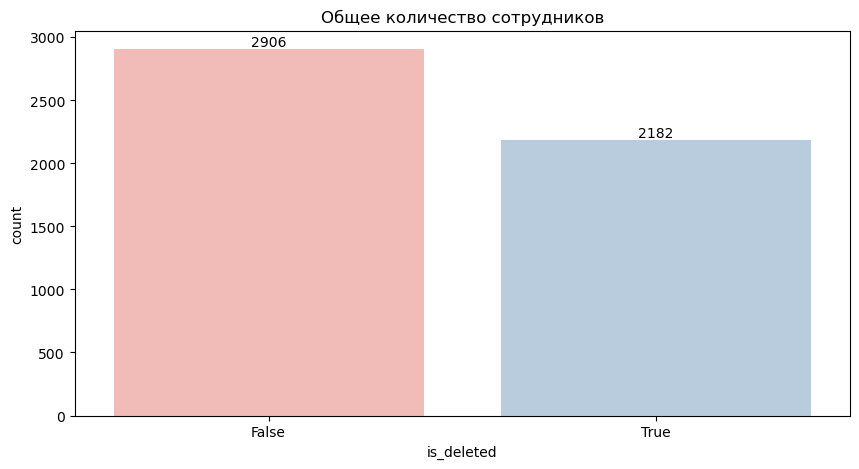

In [448]:
#распределение признака is_deleted (удален ли пользователь)
plt.figure(figsize=(10,5))
ax = sns.countplot(x = 'is_deleted', data = people, palette='Pastel1')
ax.bar_label(ax.containers[0])
plt.title("Общее количество сотрудников");

Больше пользователей неудаленных. 

### Подготовка целевой переменной

In [449]:
billing.head()

,id,user_id,company_id,billing_tariff_id,payed_until,is_payed,created_at,updated_at,billing_tariff_price_id,comment,pay_date
0,3050,567,512,3,2021-12-22 06:08:22,False,2020-12-22 06:08:22,2020-12-22 06:08:22,12,NaN,NaT
1,3051,2861,2474,7,2021-12-22 00:00:00,True,2020-12-22 08:36:02,2020-12-22 08:36:21,23,NaN,2020-12-22 08:36:21
2,3059,1902,1645,2,2021-03-24 09:18:04,False,2020-12-24 09:18:04,2020-12-24 09:18:04,6,NaN,NaT
3,3065,2352,2035,7,2022-01-29 23:59:59,False,2020-12-25 07:59:35,2020-12-25 07:59:35,23,NaN,NaT
4,3062,1074,926,3,2021-01-30 00:00:00,True,2020-12-24 12:47:52,2020-12-25 12:34:34,9,NaN,2020-12-29 00:00:00


Создадим новый столбец, запишем туда признак ухода клиента по следующей логике: ушел, если payed_until < 28.03.24 г. (согласно ТЗ). 

In [450]:
billing.groupby('company_id').agg({'id': 'nunique'}).query('id>1').reset_index()

,company_id,id
0,1,6
1,5,31
2,11,2
3,13,2
4,21,20
...,...,...
564,9852,2
565,9861,3
566,9924,2
567,9929,3


Так как одному company_id может соответствовать несколько записей в таблице billing, нужно будет ориентироваться на самую позднюю дата платежа.

In [451]:
#запишем в отдельный фрейм максимальную дату платежа по каждой компании
billing_max_payed_until = billing.groupby('company_id').agg({'payed_until': 'max'}).reset_index()
billing_max_payed_until.head()

,company_id,payed_until
0,1,2021-07-25 23:59:59
1,5,2025-06-19 23:59:59
2,6,2019-10-25 23:59:59
3,11,2023-06-30 00:00:00
4,13,2020-07-31 23:59:59


In [452]:
#переименуем столбец с датой
billing_max_payed_until = billing_max_payed_until.rename(columns={'payed_until': 'max_payed_until'})
billing_max_payed_until.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1841 entries, 0 to 1840
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   company_id       1841 non-null   int64         
 1   max_payed_until  1841 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 28.9 KB


Объединим billing_max_payed_until с billing.

In [453]:
#используем метод merge
billing = billing.merge(billing_max_payed_until, on='company_id')
billing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3479 entries, 0 to 3478
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       3479 non-null   int64         
 1   user_id                  3479 non-null   int64         
 2   company_id               3479 non-null   int64         
 3   billing_tariff_id        3479 non-null   int64         
 4   payed_until              3479 non-null   datetime64[ns]
 5   is_payed                 3479 non-null   bool          
 6   created_at               3479 non-null   datetime64[ns]
 7   updated_at               3479 non-null   datetime64[ns]
 8   billing_tariff_price_id  3479 non-null   int32         
 9   comment                  745 non-null    object        
 10  pay_date                 1108 non-null   datetime64[ns]
 11  max_payed_until          3479 non-null   datetime64[ns]
dtypes: bool(1), datetime64[ns](5), int

Далее, создаем столбец с целевой переменной по логике, описанной выше.

In [454]:
billing['churn'] = billing['max_payed_until'].apply(lambda x: 1 if x < pd.to_datetime('2024-03-28 23:59:59') else 0)
billing.head()

,id,user_id,company_id,billing_tariff_id,payed_until,is_payed,created_at,updated_at,billing_tariff_price_id,comment,pay_date,max_payed_until,churn
0,3050,567,512,3,2021-12-22 06:08:22,False,2020-12-22 06:08:22,2020-12-22 06:08:22,12,NaN,NaT,2033-04-10 23:59:59,0
1,3045,567,512,2,2026-01-05 23:59:59,False,2020-12-21 14:47:22,2020-12-21 14:47:22,1,NaN,NaT,2033-04-10 23:59:59,0
2,3046,567,512,6,2021-06-21 14:55:39,False,2020-12-21 14:55:39,2020-12-21 14:55:39,17,NaN,NaT,2033-04-10 23:59:59,0
3,3047,567,512,7,2033-04-10 23:59:59,False,2020-12-21 15:05:06,2020-12-21 15:05:06,23,NaN,NaT,2033-04-10 23:59:59,0
4,4063,567,512,2,2026-12-05 23:59:59,False,2021-05-11 07:32:19,2021-05-11 07:32:19,8,NaN,NaT,2033-04-10 23:59:59,0


### Корреляции

Подготовим таблицу для отрисовки зависимостей: так как количественные признаки нашлись только в activities, а целевая переменная в billing, соединим их по company_id, оставим только нужные столбцы.

In [455]:
churn_test = billing.groupby('company_id').agg({'churn': 'first'}).reset_index()
churn_test.head()

,company_id,churn
0,1,1
1,5,0
2,6,1
3,11,1
4,13,1


In [456]:
churn_cor = activities.merge(churn_test, on = 'company_id')
churn_cor.head()

,company_id,month,company_month_billing,company_month_stocks,company_month_backups,company_month_projects,company_month_contractors,company_month_resource_orders,churn
0,1,2019-09-01 00:00:00+00:00,1.0,0.0,0.0,7.0,0.0,0.0,1
1,1,2019-12-01 00:00:00+00:00,1.0,0.0,0.0,2.0,1.0,0.0,1
2,1,2020-04-01 00:00:00+00:00,4.0,1.0,0.0,1.0,6.0,0.0,1
3,1,2020-07-01 00:00:00+00:00,1.0,7.0,3.0,5.0,0.0,0.0,1
4,1,2020-03-01 00:00:00+00:00,0.0,34.0,0.0,0.0,0.0,0.0,1


In [457]:
#удаляем столбец month 
churn_cor = churn_cor.drop('month', axis=1)
#проверяем
churn_cor.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6274 entries, 0 to 6273
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   company_id                     6274 non-null   int64  
 1   company_month_billing          6274 non-null   float64
 2   company_month_stocks           6274 non-null   float64
 3   company_month_backups          6274 non-null   float64
 4   company_month_projects         6274 non-null   float64
 5   company_month_contractors      6274 non-null   float64
 6   company_month_resource_orders  6274 non-null   float64
 7   churn                          6274 non-null   int64  
dtypes: float64(6), int64(2)
memory usage: 441.1 KB


Рисуем корреляции числовых признаков таблицы activities и оттока.

In [458]:
phik_overview = churn_cor.phik_matrix()

interval columns not set, guessing: ['company_id', 'company_month_billing', 'company_month_stocks', 'company_month_backups', 'company_month_projects', 'company_month_contractors', 'company_month_resource_orders', 'churn']


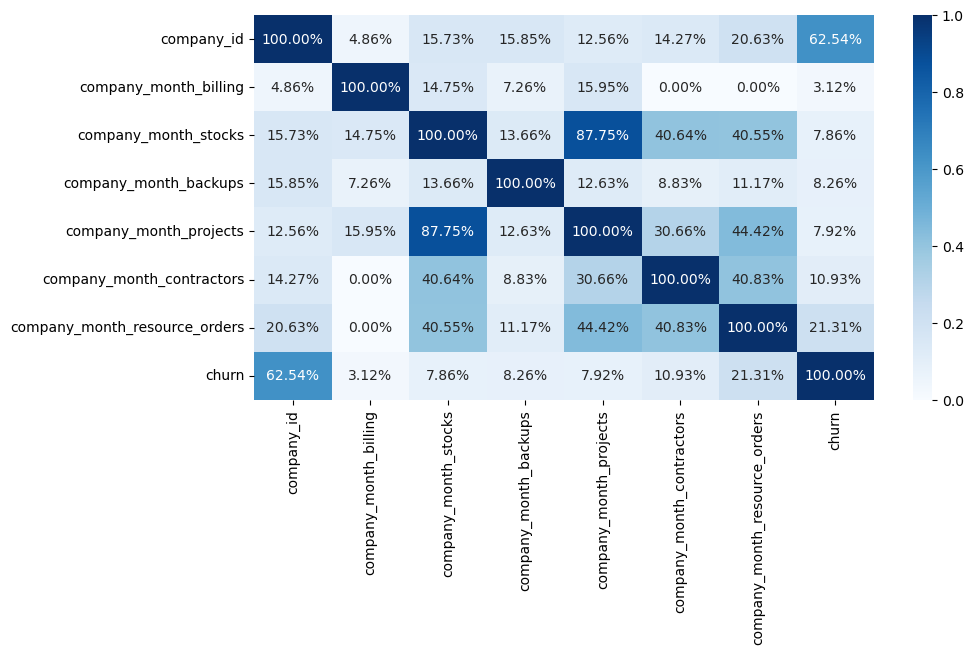

In [459]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(phik_overview, annot=True, ax=ax, cmap='Blues', fmt='0.2%');

Самую сильную (21.31 %) зависимость оттока наблюдаем от месячного количества контрагентов компании, самая слабая зависимость - от количества выставленных счетов. От остальных - зависимости примерно одинаковы.

Рисуем корреляции категориальных признаков таблицы billing и оттока.

In [460]:
phik_overview_2 = billing[['billing_tariff_id', 'is_payed','billing_tariff_price_id', 'churn']].phik_matrix()

interval columns not set, guessing: ['billing_tariff_id', 'billing_tariff_price_id', 'churn']


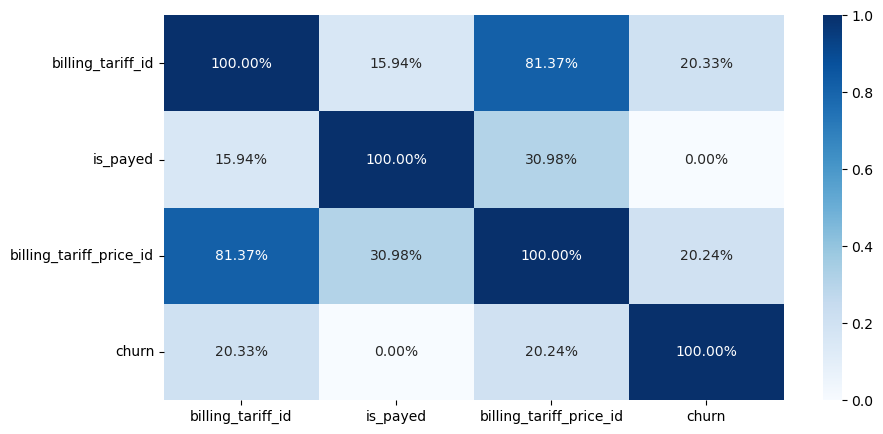

In [461]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(phik_overview_2, annot=True, ax=ax, cmap='Blues', fmt='0.2%');

Примерно одинаковая зависимость оттока от billing_tariff_id и billing_tariff_price_id на уровне 20%.

### Портрет пользователя

Подготовим табличку для последующих агрегаций.

In [462]:
#переименуем в companies столбец id в company_id, чтобы соединить с people
companies = companies.rename(columns={'id': 'company_id'})
companies.columns

Index(['company_id', 'working_direction', 'employer_count_interval',
       'created_at', 'updated_at', 'billing_tariff_id', 'billing_is_over'],
      dtype='object')

In [463]:
#соединим companies и people с помощью метода merge
df_gen = companies.merge(people, on='company_id')
df_gen.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5014 entries, 0 to 5013
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   company_id               5014 non-null   int64         
 1   working_direction        5014 non-null   object        
 2   employer_count_interval  5014 non-null   float64       
 3   created_at_x             5014 non-null   datetime64[ns]
 4   updated_at_x             5014 non-null   datetime64[ns]
 5   billing_tariff_id        5014 non-null   int32         
 6   billing_is_over          5014 non-null   bool          
 7   id                       5014 non-null   int64         
 8   user_id                  3784 non-null   Int64         
 9   role_id                  5014 non-null   int64         
 10  created_at_y             5014 non-null   datetime64[ns]
 11  updated_at_y             5014 non-null   datetime64[ns]
 12  is_deleted               5014 non-

In [464]:
#переименуем задвоенные столбцы
df_gen = df_gen.rename(columns={'created_at_x': 'created_at_comp', 'updated_at_x': 'updated_at_comp',\
                                'created_at_y': 'created_at_people', 'updated_at_y': 'updated_at_people'})
df_gen.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5014 entries, 0 to 5013
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   company_id               5014 non-null   int64         
 1   working_direction        5014 non-null   object        
 2   employer_count_interval  5014 non-null   float64       
 3   created_at_comp          5014 non-null   datetime64[ns]
 4   updated_at_comp          5014 non-null   datetime64[ns]
 5   billing_tariff_id        5014 non-null   int32         
 6   billing_is_over          5014 non-null   bool          
 7   id                       5014 non-null   int64         
 8   user_id                  3784 non-null   Int64         
 9   role_id                  5014 non-null   int64         
 10  created_at_people        5014 non-null   datetime64[ns]
 11  updated_at_people        5014 non-null   datetime64[ns]
 12  is_deleted               5014 non-

Далее к полученной таблице присоединим billing так же методом merge.

In [465]:
df_gen = df_gen.merge(billing, on = 'company_id')
df_gen.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14504 entries, 0 to 14503
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   company_id               14504 non-null  int64         
 1   working_direction        14504 non-null  object        
 2   employer_count_interval  14504 non-null  float64       
 3   created_at_comp          14504 non-null  datetime64[ns]
 4   updated_at_comp          14504 non-null  datetime64[ns]
 5   billing_tariff_id_x      14504 non-null  int32         
 6   billing_is_over          14504 non-null  bool          
 7   id_x                     14504 non-null  int64         
 8   user_id_x                10786 non-null  Int64         
 9   role_id                  14504 non-null  int64         
 10  created_at_people        14504 non-null  datetime64[ns]
 11  updated_at_people        14504 non-null  datetime64[ns]
 12  is_deleted               14504 n

In [466]:
#переименуем задвоенные столбцы
df_gen = df_gen.rename(columns={'id_x': 'id_people', 'user_id_x': 'user_id_people',\
                                'id_y': 'id_billing', 'user_id_y': 'user_id_billing',\
                                'billing_tariff_id_x': 'billing_tariff_id_comp', \
                                'billing_tariff_id_y': 'billing_tariff_id_billing'})
df_gen.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14504 entries, 0 to 14503
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   company_id                 14504 non-null  int64         
 1   working_direction          14504 non-null  object        
 2   employer_count_interval    14504 non-null  float64       
 3   created_at_comp            14504 non-null  datetime64[ns]
 4   updated_at_comp            14504 non-null  datetime64[ns]
 5   billing_tariff_id_comp     14504 non-null  int32         
 6   billing_is_over            14504 non-null  bool          
 7   id_people                  14504 non-null  int64         
 8   user_id_people             10786 non-null  Int64         
 9   role_id                    14504 non-null  int64         
 10  created_at_people          14504 non-null  datetime64[ns]
 11  updated_at_people          14504 non-null  datetime64[ns]
 12  is_d

Плюс ещё одна табличка - активности.

In [467]:
df_gen = df_gen.merge(activities, on = 'company_id')
df_gen.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252733 entries, 0 to 252732
Data columns (total 33 columns):
 #   Column                         Non-Null Count   Dtype              
---  ------                         --------------   -----              
 0   company_id                     252733 non-null  int64              
 1   working_direction              252733 non-null  object             
 2   employer_count_interval        252733 non-null  float64            
 3   created_at_comp                252733 non-null  datetime64[ns]     
 4   updated_at_comp                252733 non-null  datetime64[ns]     
 5   billing_tariff_id_comp         252733 non-null  int32              
 6   billing_is_over                252733 non-null  bool               
 7   id_people                      252733 non-null  int64              
 8   user_id_people                 188328 non-null  Int64              
 9   role_id                        252733 non-null  int64              
 10  created_

Портрет наиболее массовой компании-пользователя.

In [468]:
df_gen.groupby('company_id').agg({'id_people': 'nunique', 'created_at_comp': 'min', 'updated_at_comp': 'max',\
                                  'billing_tariff_id_comp': 'first', 'billing_tariff_price_id': 'nunique',\
                                  'billing_tariff_price_id': 'unique', 'churn': 'first', 'payed_until': 'max'})\
                            .reset_index().sort_values(by='id_people', ascending=False).head(1)

,company_id,id_people,created_at_comp,updated_at_comp,billing_tariff_id_comp,billing_tariff_price_id,churn,payed_until
546,6806,55,2022-10-17 07:36:15,2023-11-25 22:00:01,13,"[32, 41]",1,2023-11-25


Итак, компания из 55 сотрудников, в оттоке после 1 года использования сервиса Gectaro, тарифный план - 13 (группа "Профи"), имела две модификации оплаты тарифа.

### Гипотезы

***Есть ли зависимость уходов компаний от размера компании?***

In [469]:
#отточные клиенты
df_gen[df_gen['churn']==1].groupby('company_id').agg({'id_people': 'nunique'})['id_people'].sum() /\
                            df_gen[df_gen['churn']==1].groupby('company_id').agg({'company_id': 'nunique'})['company_id'].sum()

6.251082251082251

In [470]:
#неотточные клиенты
df_gen[df_gen['churn']==0].groupby('company_id').agg({'id_people': 'nunique'})['id_people'].sum()/\
                        df_gen[df_gen['churn']==0].groupby('company_id').agg({'company_id': 'nunique'})['company_id'].sum()

8.821576763485478

У неотточных компаний сотрудников больше, т.е. можно предположить, что компании с меньшим количеством сотрудников больше подвержены оттоку.

***Влияет ли billing_tariff_price_id на целевую переменную?***

In [471]:
#в оттоке с billing_tariff_price_id>1
df_gen[df_gen['churn']==1].groupby('company_id')\
                          .agg({'billing_tariff_price_id':'nunique'})\
                          .query('billing_tariff_price_id>1').sort_values(by='billing_tariff_price_id', ascending=False)\
                          .reset_index()

,company_id,billing_tariff_price_id
0,981,11
1,3277,8
2,430,8
3,2227,8
4,2431,7
...,...,...
143,3031,2
144,3003,2
145,2948,2
146,2866,2


In [472]:
#не в оттоке с billing_tariff_price_id>1
df_gen[df_gen['churn']==0].groupby('company_id')\
                          .agg({'billing_tariff_price_id':'nunique'})\
                          .query('billing_tariff_price_id>1').sort_values(by='billing_tariff_price_id', ascending=False)\
                          .reset_index()

,company_id,billing_tariff_price_id
0,628,7
1,512,6
2,5050,6
3,1255,6
4,3518,5
...,...,...
83,6080,2
84,6113,2
85,6141,2
86,6179,2


In [473]:
#в оттоке с billing_tariff_price_id==1
df_gen[df_gen['churn']==1].groupby('company_id')\
                          .agg({'billing_tariff_price_id':'nunique'})\
                          .query('billing_tariff_price_id==1').sort_values(by='billing_tariff_price_id', ascending=False)\
                          .reset_index()

,company_id,billing_tariff_price_id
0,303,1
1,4664,1
2,4963,1
3,4906,1
4,4894,1
...,...,...
309,2704,1
310,2683,1
311,2670,1
312,2653,1


In [474]:
#не в оттоке с billing_tariff_price_id==1
df_gen[df_gen['churn']==0].groupby('company_id')\
                          .agg({'billing_tariff_price_id':'nunique'})\
                          .query('billing_tariff_price_id==1').sort_values(by='billing_tariff_price_id', ascending=False)\
                          .reset_index()

,company_id,billing_tariff_price_id
0,408,1
1,8365,1
2,8219,1
3,8236,1
4,8246,1
...,...,...
148,6596,1
149,6609,1
150,6612,1
151,6627,1


Большинство отточных с одним billing_tariff_price_id. Выглядит логично: клиенты не нашли для себя плюсов в сервисе и ушли сразу. 

***С каких тарифов уходят чаще? Почему?***

In [475]:
df_gen[df_gen['churn']==1].groupby('company_id')\
                          .agg({'billing_tariff_price_id':'nunique', 'billing_tariff_id_billing':'first'})\
                          .query('billing_tariff_price_id==1').sort_values(by='billing_tariff_price_id', ascending=False)\
                          .reset_index()['billing_tariff_id_billing'].mode()

0    2
Name: billing_tariff_id_billing, dtype: int64

Самый частотный тариф у отточных с billing_tariff_price_id==1 -- 2 (группа "базовый"). Он и самый массовый по оплатам, вероятнее всего этим и объясняется его частотность в оттоке.

In [476]:
df_gen.query('churn==1 & billing_tariff_id_billing != 2')\
                          .groupby('company_id')\
                          .agg({'billing_tariff_price_id':'nunique', 'billing_tariff_id_billing':'first'})\
                          .query('billing_tariff_price_id==1').sort_values(by='billing_tariff_price_id', ascending=False)\
                          .reset_index()['billing_tariff_id_billing'].mode()

0    7
Name: billing_tariff_id_billing, dtype: int64

In [477]:
df_gen.query('churn==1 & billing_tariff_id_billing != 2 & billing_tariff_id_billing != 7')\
                          .groupby('company_id')\
                          .agg({'billing_tariff_price_id':'nunique', 'billing_tariff_id_billing':'first'})\
                          .query('billing_tariff_price_id==1').sort_values(by='billing_tariff_price_id', ascending=False)\
                          .reset_index()['billing_tariff_id_billing'].mode()

0    4
Name: billing_tariff_id_billing, dtype: int64

4 и 7 - на втором и третьем местах по уровню оттока - тарифы из одной группы "Старт". Можно сделать предположение о том, что на тариф "Старт" приходят потенциально "ложные" клиенты.

### Выводы

1. У всех числовых признаков (месячное количесто складов компании, месячное количество бэкапов компании, месячное количество проектов компании, месячное количество контрагентов компании, месячное количество заказов материалов компании) распределения с пиками на 0 - min значении. Самый большой разброс данных у признака "месячное количество заказов материалов компании". Больше всего оплат у тарифных планов 2 и 7, которые относятся к группам "Старт" и "Базовый". По признаку "is_payed" больше неоплат, чем оплат.Подавляющее большинство компаний с минимальным количеством сотрудников - от 1 до 4, и у большинства - истекла оплата. 
2. Корелляции: самую сильную (21.31 %) зависимость оттока наблюдаем от месячного количества контрагентов компании, самая слабая зависимость - от количества выставленных счетов. От остальных - зависимости примерно одинаковы.Примерно одинаковая зависимость оттока от billing_tariff_id и billing_tariff_price_id (на уровне 20%).
3. Портрет наиболее массовой компании-клиента выглядит так: 55 сотрудников, в оттоке после 1 года использования сервиса Gectaro, тарифный план - 13 (группа "Профи"), имела две модификации оплаты тарифа.
4. Гипотезы о зависимости уровня оттока от различных признаков:
* у неотточных компаний сотрудников больше, т.е. можно предположить, что компании с меньшим количеством сотрудников больше подвержены оттоку;
* большинство отточных с одним billing_tariff_price_id; 
* самый частотный тариф у отточных с billing_tariff_price_id==1 -- 2 (группа "базовый"). Он и самый массовый по оплатам, вероятнее всего этим и объясняется его частотность в оттоке. 4 и 7 - на втором и третьем местах по уровню оттока - тарифы из одной группы "Старт". Можно сделать предположение о том, что на тариф "Старт" приходят потенциально "ложные" клиенты.